# Computing Similarity

In this notebook we'll take the fitness for task for all of the alternatives and convert it into a csv (data/acw-scores-fitness_only.csv) and will calculate a modified 'euclidean distance' equation on it. This 'distance' can determine how close or far two tools are from being the same tool (score of 0) or wildly different (score of TBD).

In [2]:
from math import *
from pandas import *
import numpy

In [3]:
# The formula for Distance is defined here. This takes 2 lists and will sum the distances between the 1st, 2nd, ... nth items, pairwise, in each list.
def euclidean_distance(x,y):
  return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

In [5]:
#Read in the data
alternatives = ['AppEEARS','Field Campaign Explorer (FCX)','OpenAltimetry','Data Access Tool','Operation IceBridge Portal','Vertex','Earthdata Search','SOOT','Airborne Data Visualizer','Giovanni','Worldview']

data = read_csv('data/acw-scores-fitness_only.csv')
vectors = {}
for x in alternatives:
  vectors[x] =  data[x].tolist()


In [6]:
# Setup our result array (there are 11 alternatives, so we create an 11x11 matrix)
results =  numpy.zeros((11, 11))


In [7]:
# Iterate over the whole thing
for i,k in enumerate(vectors.keys()):
  for j, alternative in enumerate(alternatives):
    if k == alternative:
      score = 0
    else:
      # ok, normally euclidean distance is the same regardless of ordering, but in the case
      # where a tool has more functionality than another tool, then we want the scores to be
      # different. So we take the tool we're examining and remove all '0's, or capabilities
      # it doesn't have, remove those from the comparison tool, and then calculate 'distance'.
      # In the case of higher overlaps, we get a smaller number. When we compute the inverse
      # relationship- the tool with many capabilities and the comparison tool without them,
      # there will be A) more comparisons and B) a larger resulting number, signifying that
      # it's harder to converge one way vs the other.

      idxlist = numpy.nonzero(vectors[k])[0]
      temp_vector = [vectors[k][idx] for idx in idxlist]
      temp_alternative = [vectors[alternative][idx] for idx in idxlist]

      score = euclidean_distance(temp_vector,temp_alternative)
    results[i][j] = score



## Understanding the results

Each column is an alternative (C). The rows (R) in that column score how much R's functionality is covered by C. So if a tool C completely covers the functionality for R, the score will be 0. This is why the identity diagonal is always 0.

Lower scores in a column mean that there are fewer functional gaps. 


In [8]:

# print(results)
df = DataFrame(results, alternatives, alternatives)
df

,AppEEARS,Field Campaign Explorer (FCX),OpenAltimetry,Data Access Tool,Operation IceBridge Portal,Vertex,Earthdata Search,SOOT,Airborne Data Visualizer,Giovanni,Worldview
AppEEARS,0.000000,93.375586,101.212647,127.824098,126.249752,74.759615,73.579889,101.434708,119.348230,35.552778,134.513940
Field Campaign Explorer (FCX),110.227038,0.000000,109.886305,143.788038,133.135270,101.118742,110.792599,130.288142,117.686023,68.920244,133.135270
OpenAltimetry,98.742088,83.516465,0.000000,120.104121,104.761634,84.113019,80.932070,104.522725,103.682207,59.791304,117.898261
Data Access Tool,54.671748,59.581876,51.234754,0.000000,48.218254,40.620192,42.130749,44.721360,63.047601,29.580399,64.614240
Operation IceBridge Portal,71.337227,52.201533,40.926764,69.462220,0.000000,46.368092,46.368092,67.082039,60.000000,47.434165,79.372539
Vertex,119.745564,128.160056,130.288142,152.807068,147.478812,0.000000,91.651514,124.799840,146.458185,82.462113,157.400762
Earthdata Search,106.131993,124.799840,114.673449,144.827484,137.295302,76.811457,0.000000,110.340382,138.473824,61.441029,152.643375
SOOT,75.093275,95.786220,88.459030,103.440804,103.440804,50.744458,40.926764,0.000000,106.418983,51.961524,114.455231
Airborne Data Visualizer,74.498322,39.051248,59.371710,93.674970,79.214898,59.371710,64.420494,86.023253,0.000000,57.008771,91.515026
Giovanni,125.753728,126.984251,135.185058,167.854103,165.680415,110.453610,108.050914,145.258390,162.941707,0.000000,167.032931


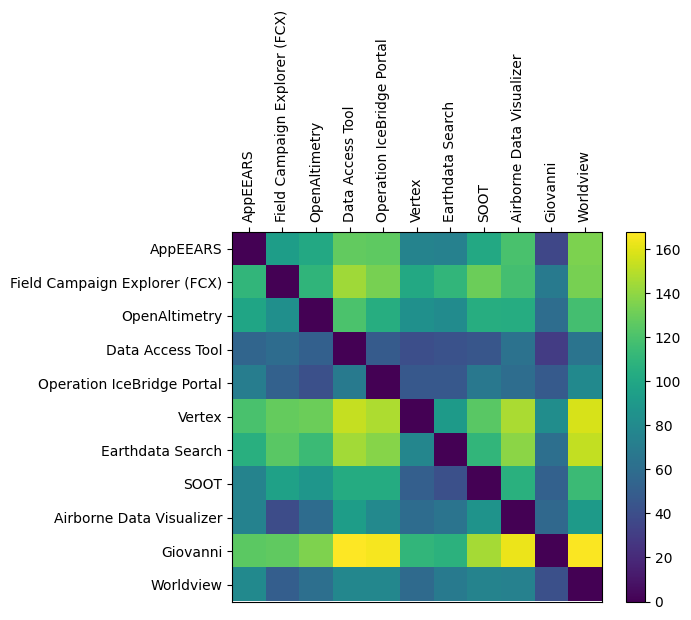

In [40]:
import matplotlib.pyplot as plt

#plt.matshow(df)
fig, ax = plt.subplots()
im = ax.imshow(df)
ax.xaxis.tick_top()
plt.colorbar(im, ax=ax)
ax.set_xticks(numpy.arange(len(alternatives)), labels=alternatives, rotation=90)
ax.set_yticks(numpy.arange(len(alternatives)), labels=alternatives)
plt.show()